# Importing Libraries

In [2]:
import numpy as np
import gzip
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.sparse import coo_matrix

In [3]:
def getGRCIndex(x, y, xbl, ybl):
    j = 0
    for b in xbl[1:]:
        if x < b:
            break
        j += 1
    i = 0
    for b in ybl[1:]:
        if y < b:
            break
        i += 1
    return i, j

## Loading the Data

In [4]:
with gzip.open('NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar.json.gz','rb') as f:
    design = json.loads(f.read().decode('utf-8'))

In [25]:
with gzip.open('NCSU-DigIC-GraphData-2023-07-25/cells.json.gz','rb') as f:
    cells = json.loads(f.read().decode('utf-8'))

# Distribution Analysis

## Degree Distribution across all 13 Designs

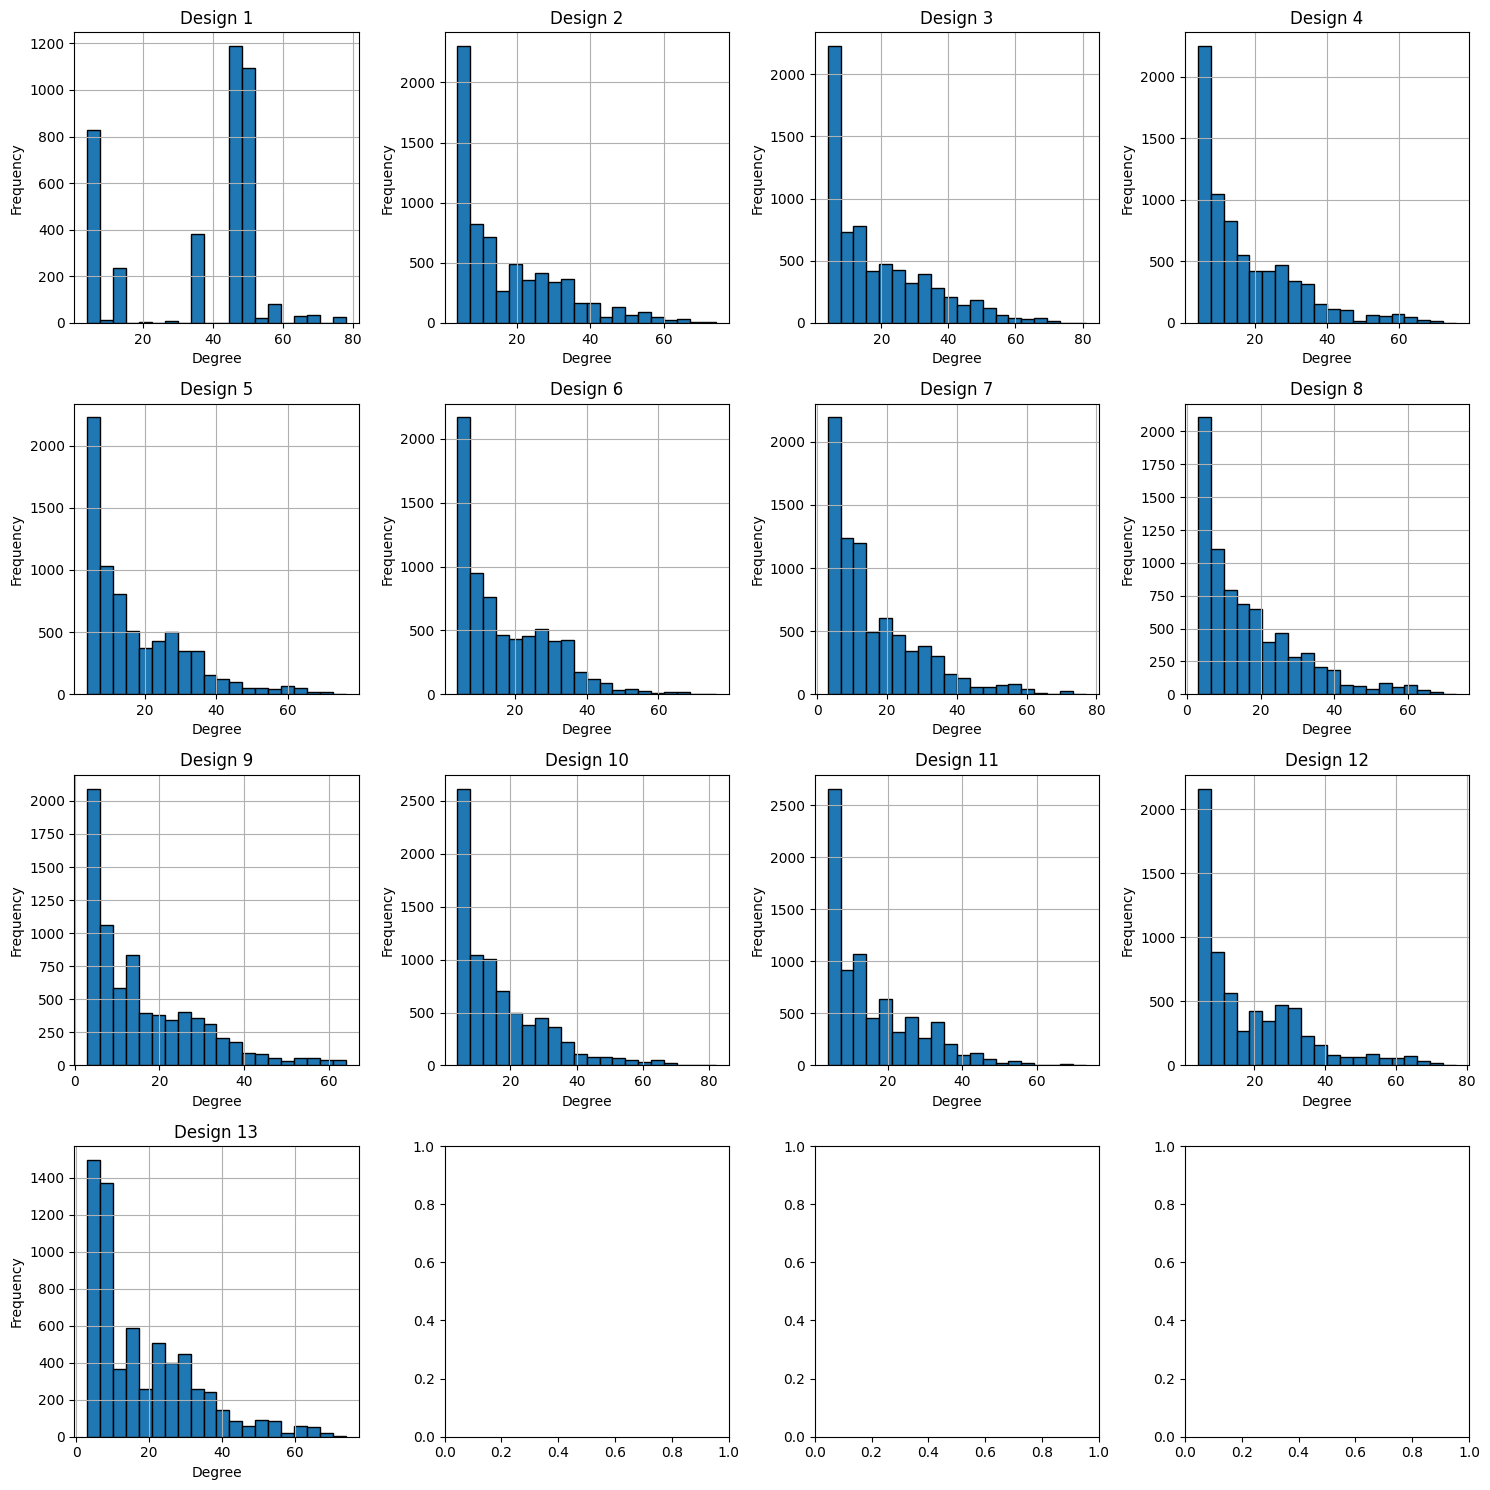

In [12]:
num_designs = 13

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for design_num in range(1, num_designs + 1):
    file_path = f'NCSU-DigIC-GraphData-2023-07-25/xbar/{design_num}/xbar_connectivity.npz'
    
    conn = np.load(file_path)
    A = coo_matrix((conn['data'], (conn['row'], conn['col'])), shape=conn['shape'])
    A = A.__mul__(A.T)
    G = nx.from_numpy_array(A.toarray())
    degrees = [deg for node, deg in G.degree()]
    axes[design_num - 1].hist(degrees, bins=20, edgecolor='black')
    axes[design_num - 1].set_title(f'Design {design_num}')
    axes[design_num - 1].set_xlabel('Degree')
    axes[design_num - 1].set_ylabel('Frequency')
    axes[design_num - 1].grid(True)
plt.tight_layout()
plt.show()


## Cell Type Count per Design

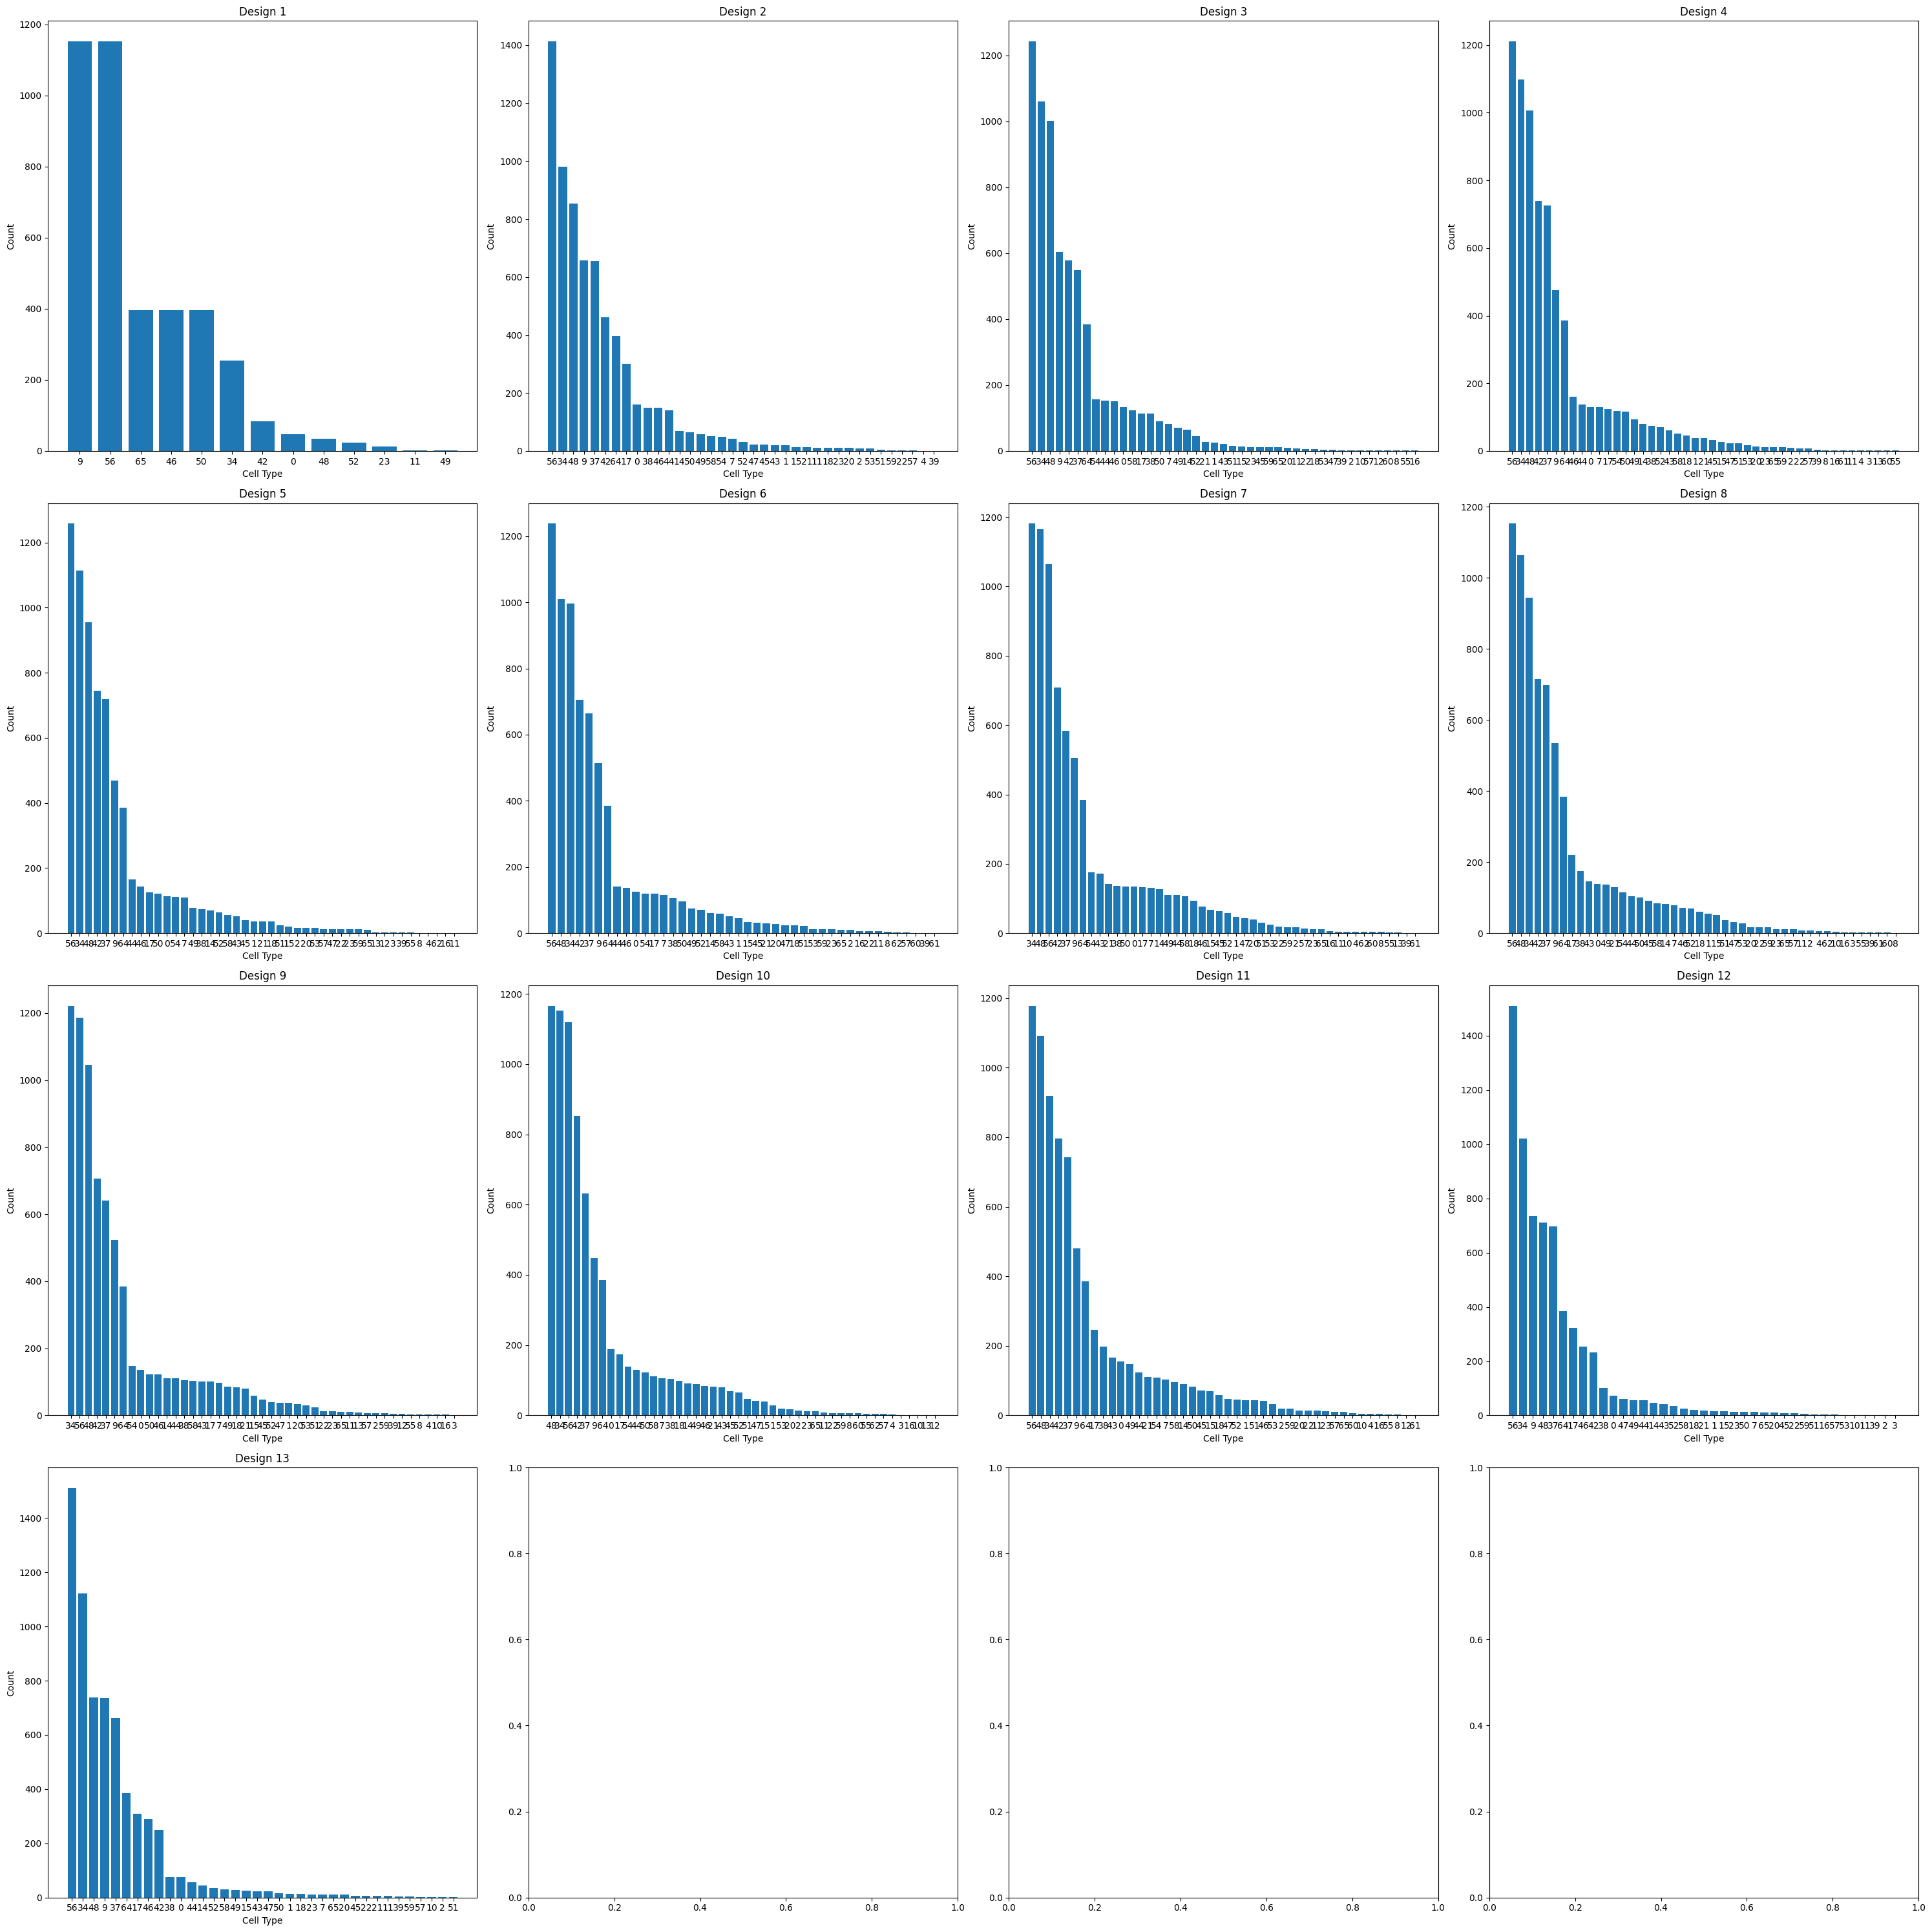

In [21]:
num_designs = 13
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))
axes = axes.flatten()

for design_num in range(1, num_designs + 1):
    file_path = f'NCSU-DigIC-GraphData-2023-07-25/xbar/{design_num}/xbar.json.gz'

    with gzip.open(file_path, 'rb') as f:
        design = json.loads(f.read().decode('utf-8'))
    instances = pd.DataFrame(design['instances'])
    
    value_counts = instances['cell'].value_counts()
    
    axes[design_num - 1].bar(x=value_counts.index.astype(str), height=value_counts.values)
    axes[design_num - 1].set_title(f'Design {design_num}')
    axes[design_num - 1].set_xlabel('Cell Type')
    axes[design_num - 1].set_ylabel('Count')
    axes[design_num - 1].tick_params(axis='x')
    
plt.tight_layout()
plt.show()

## Congestion per Layer for each Design

Design 1


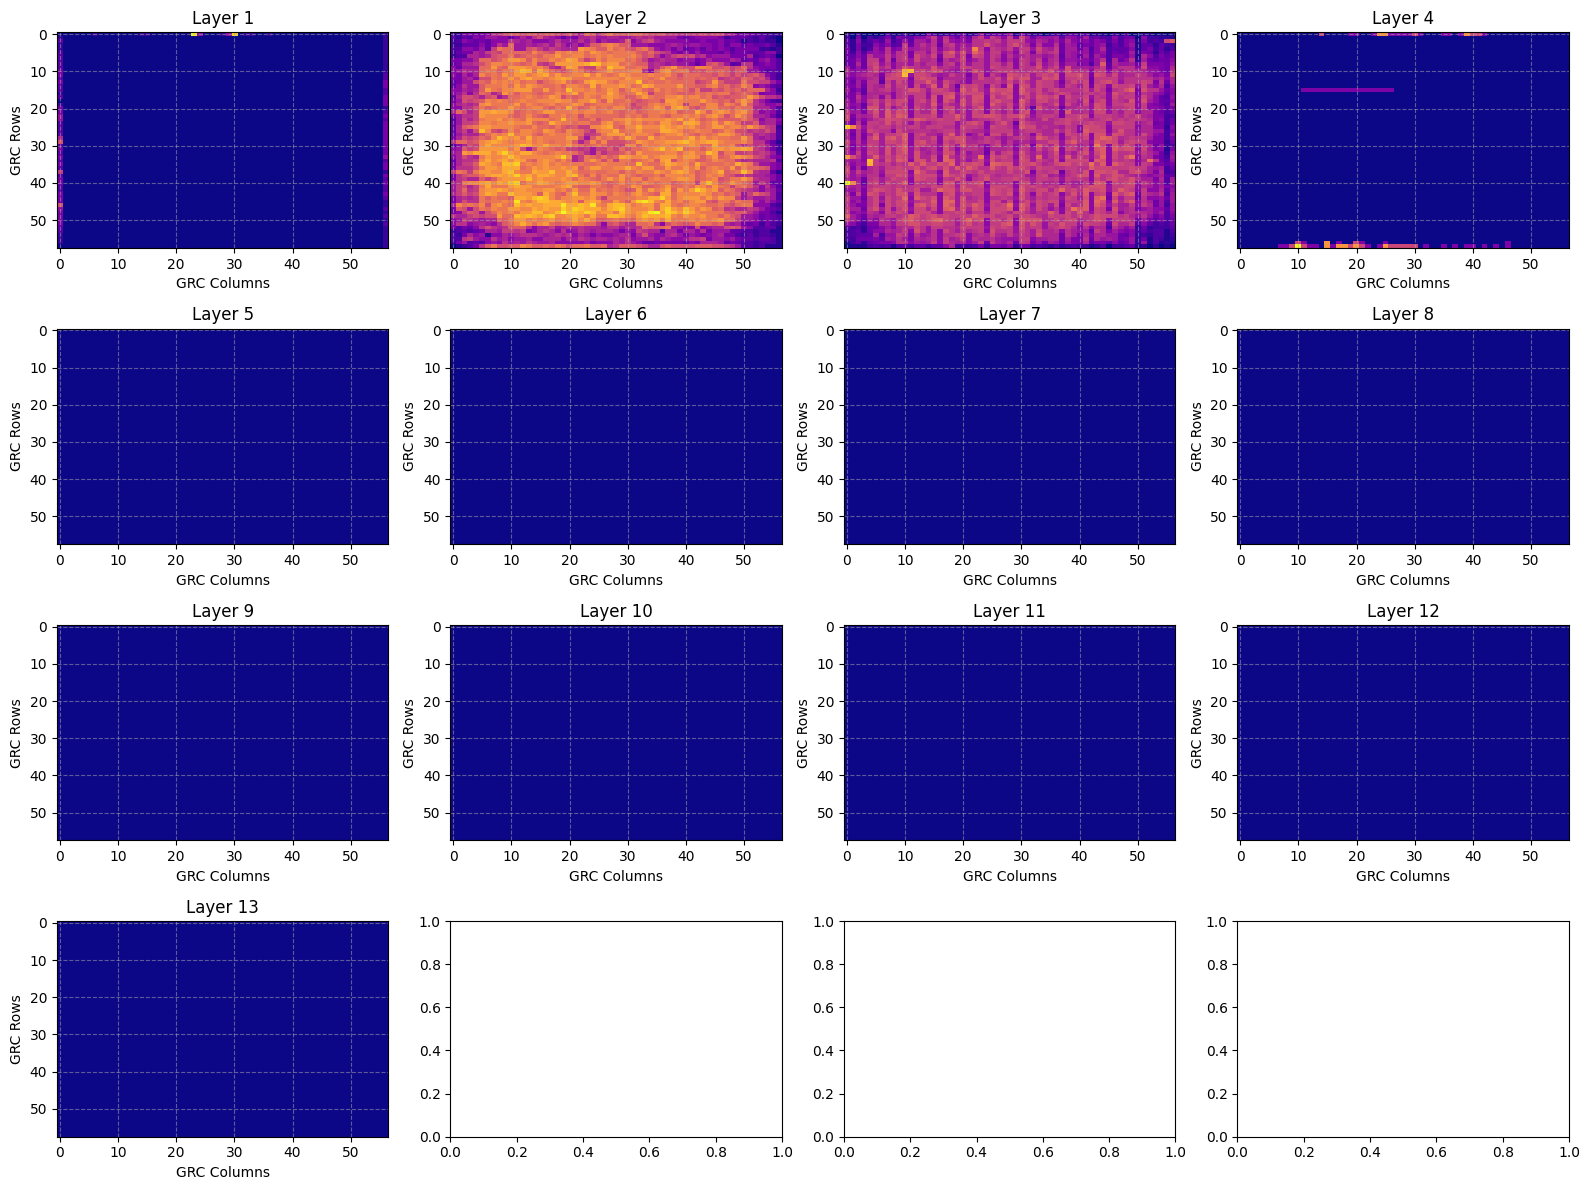

Design 2


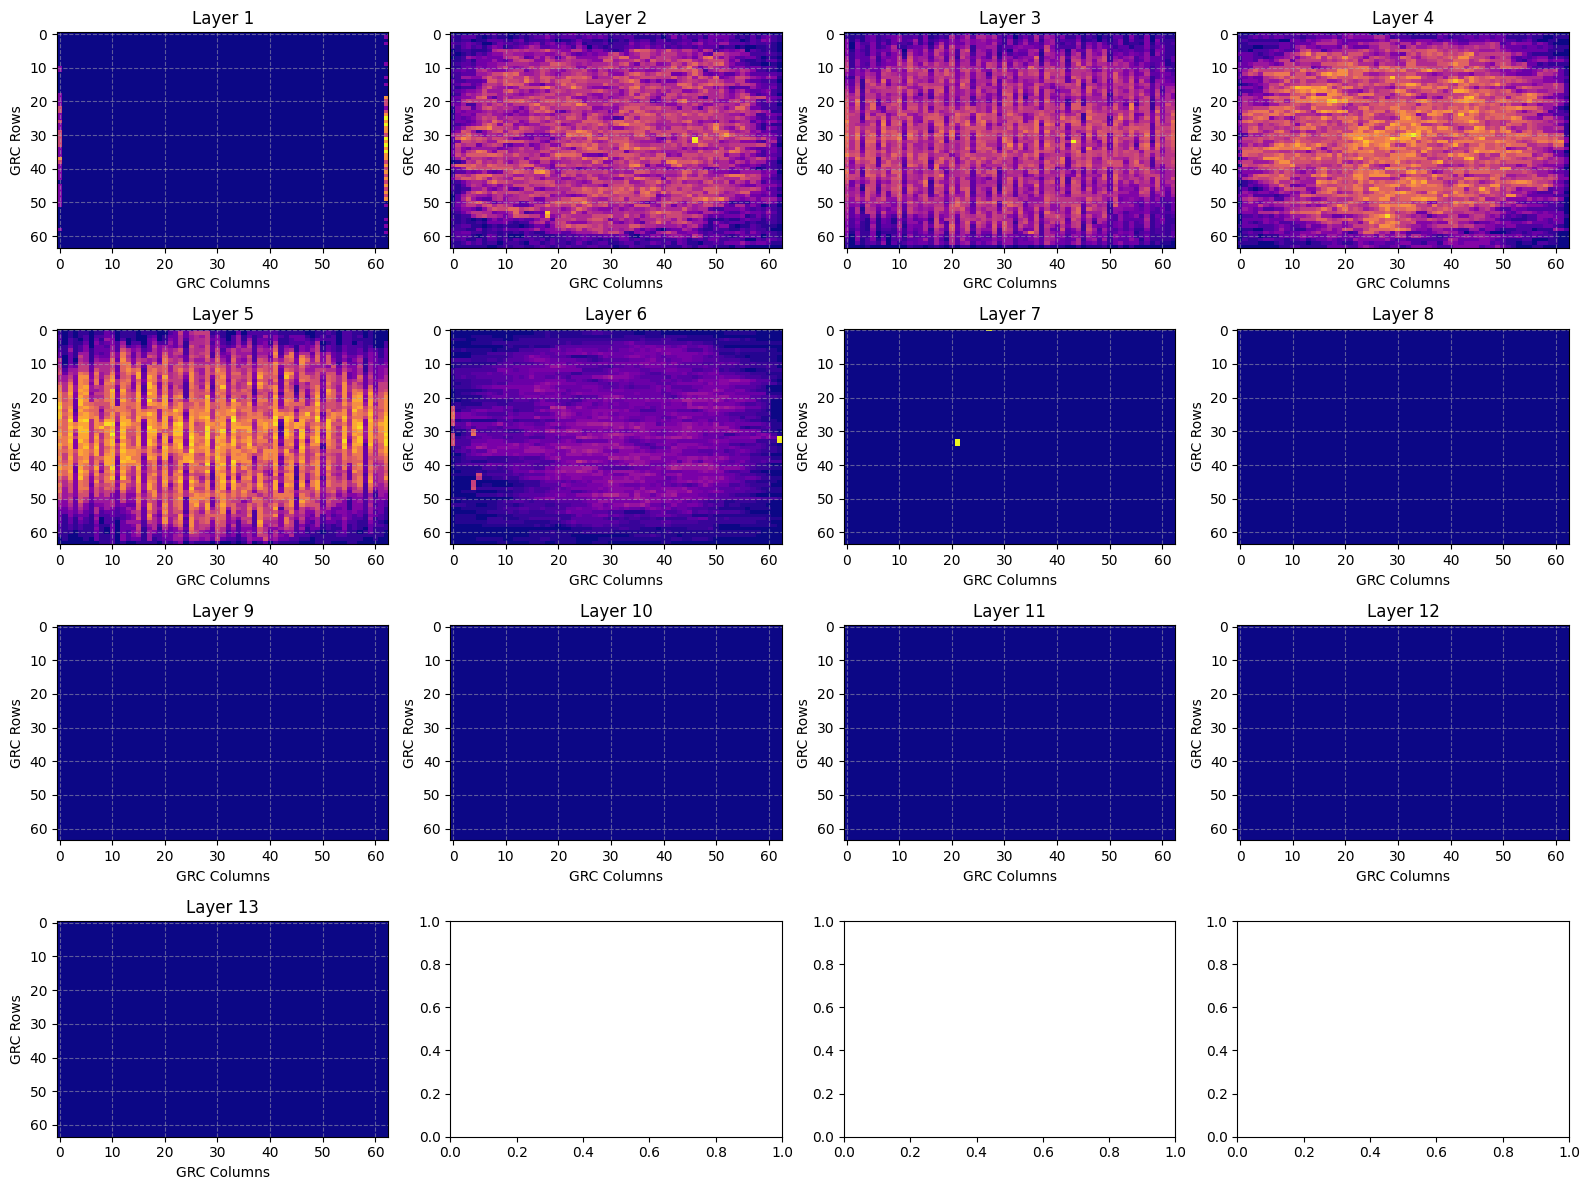

Design 3


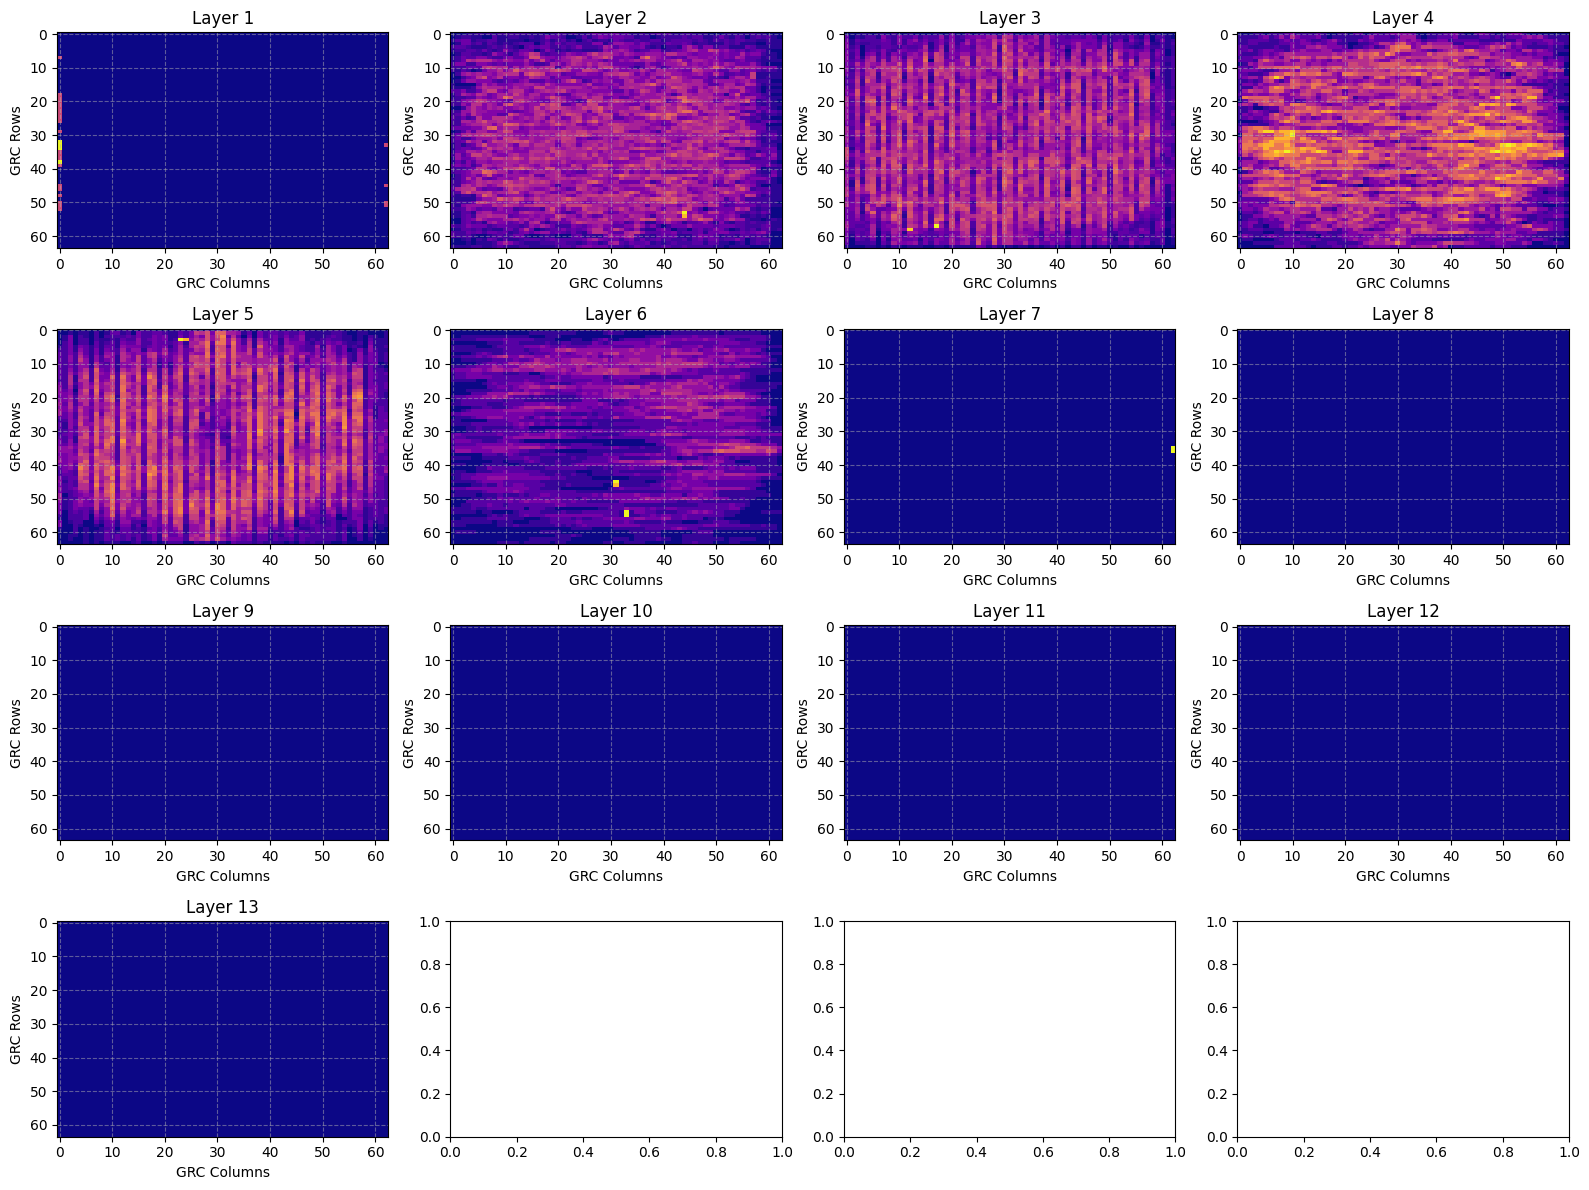

Design 4


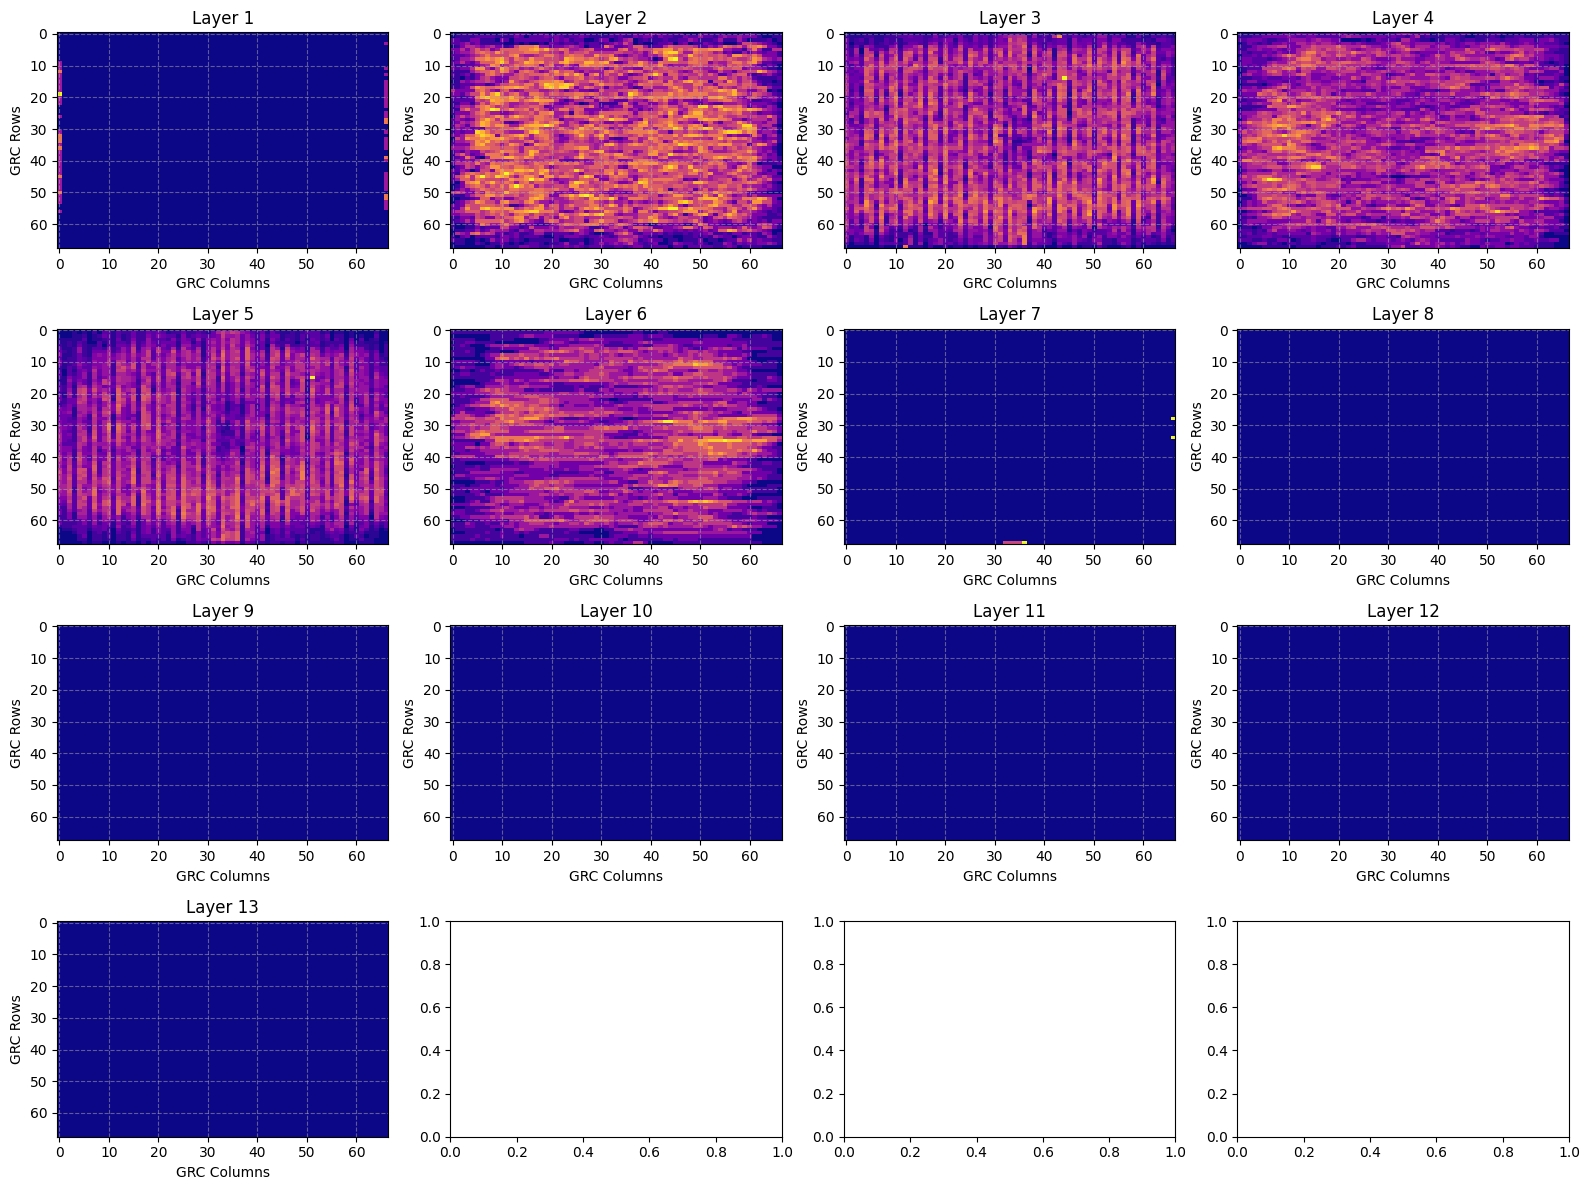

Design 5


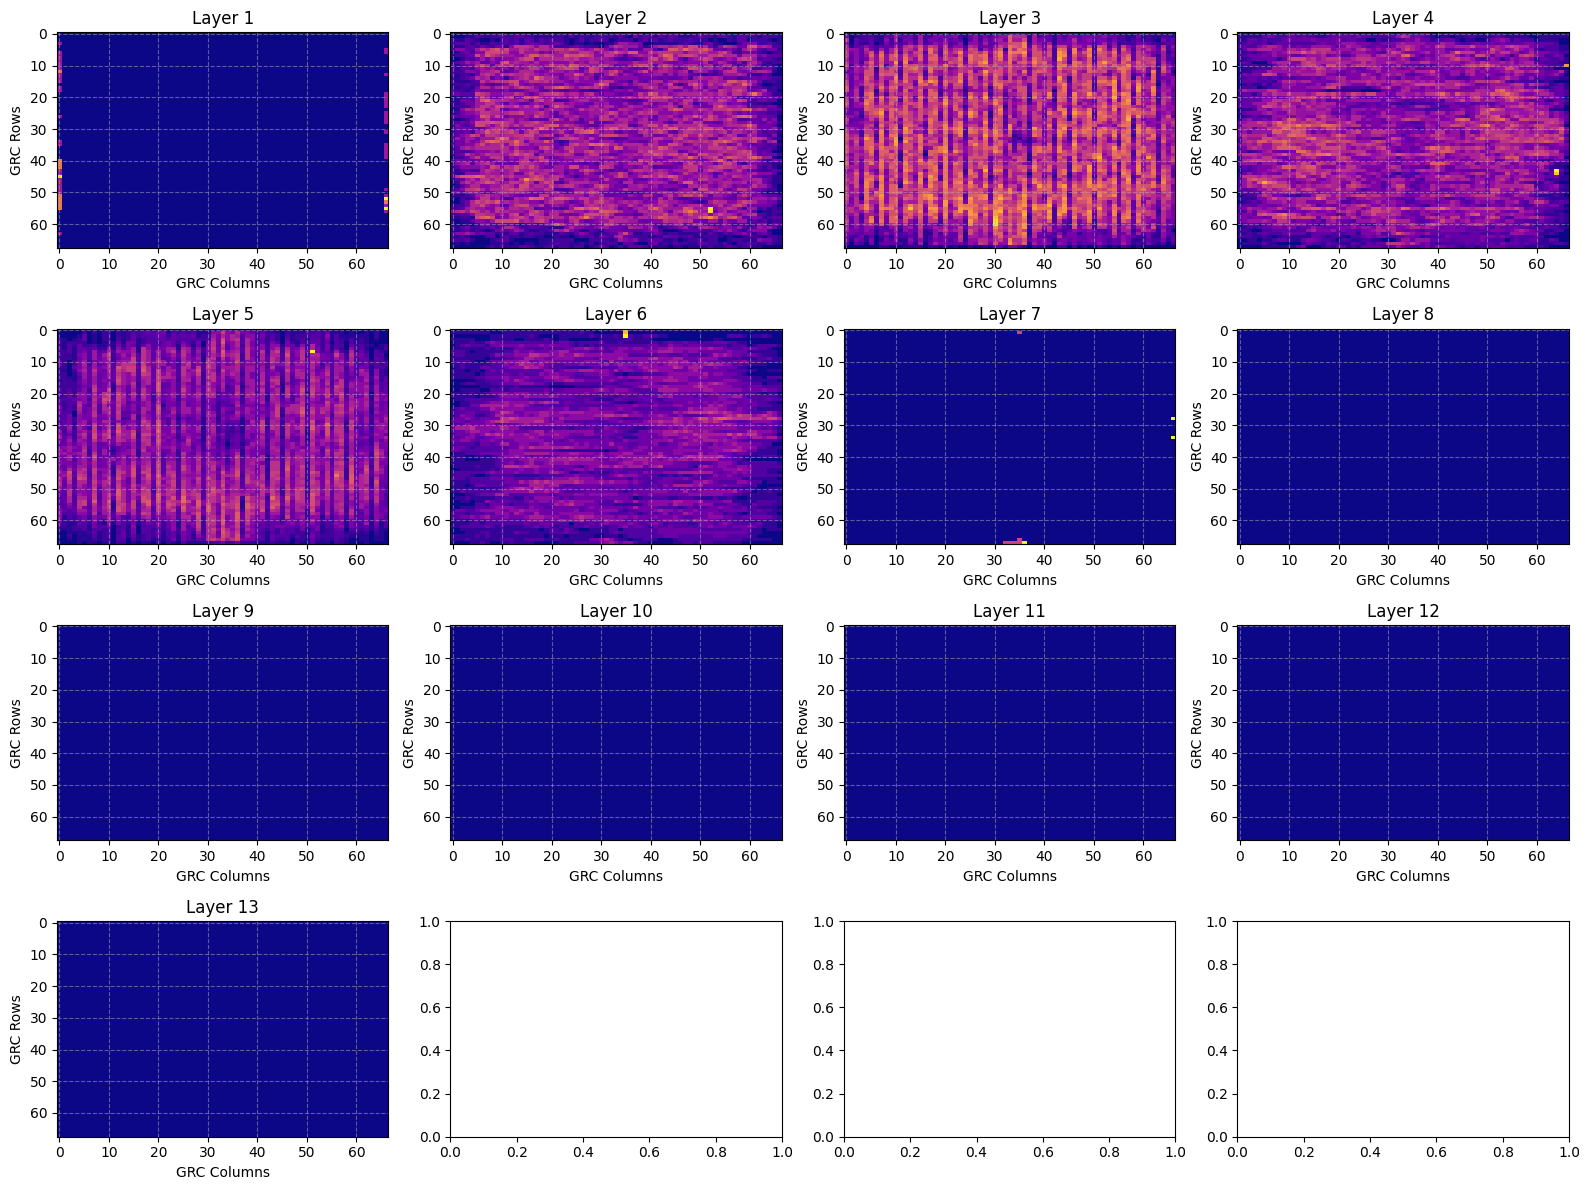

Design 6


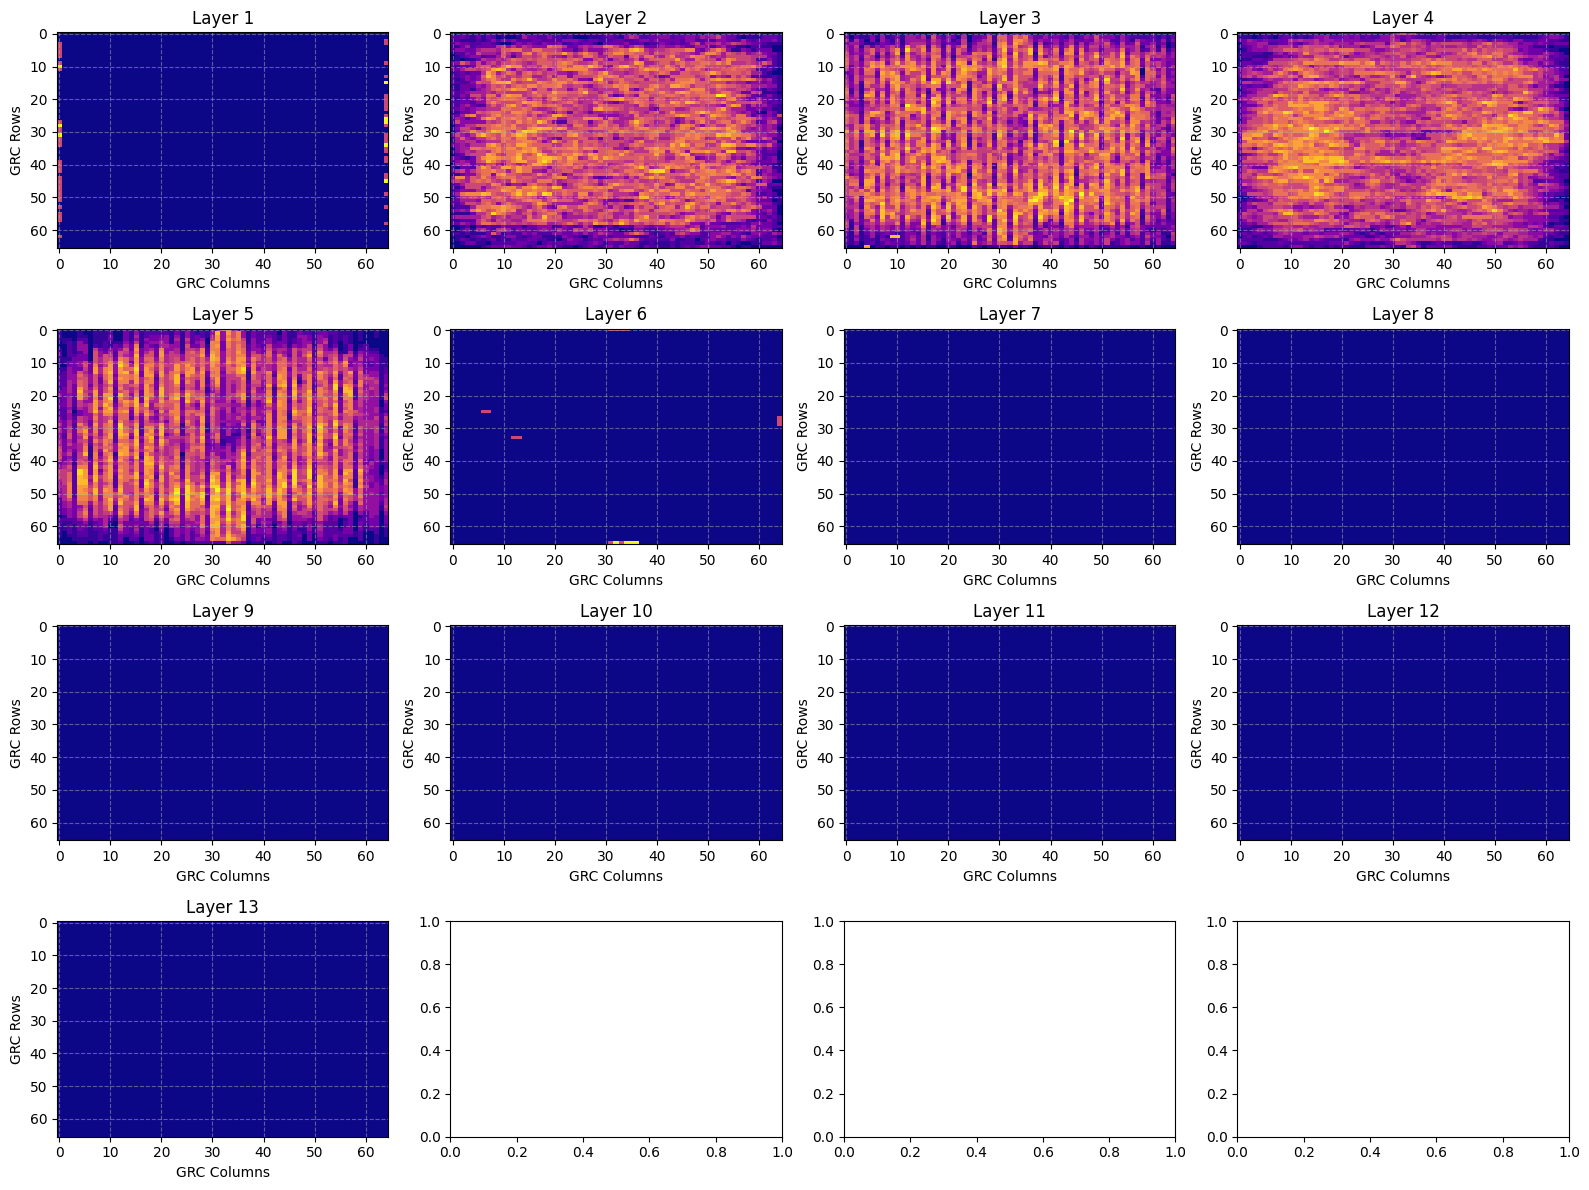

Design 7


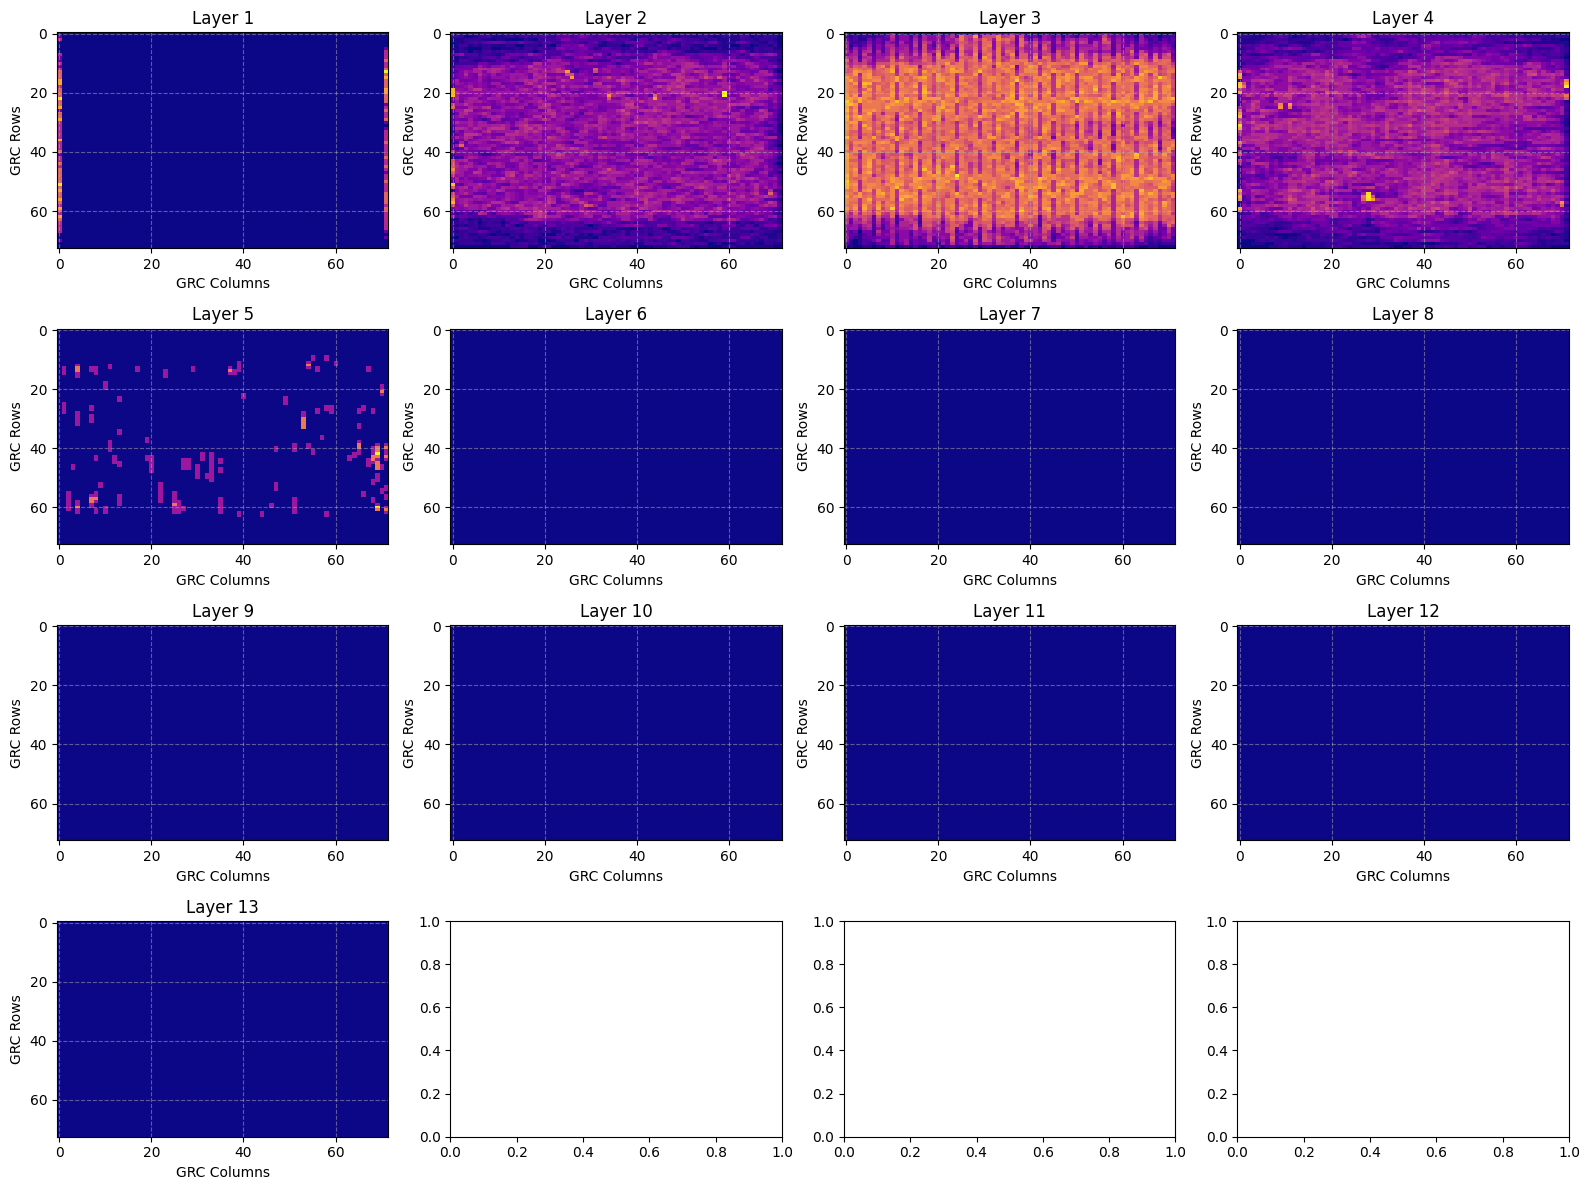

Design 8


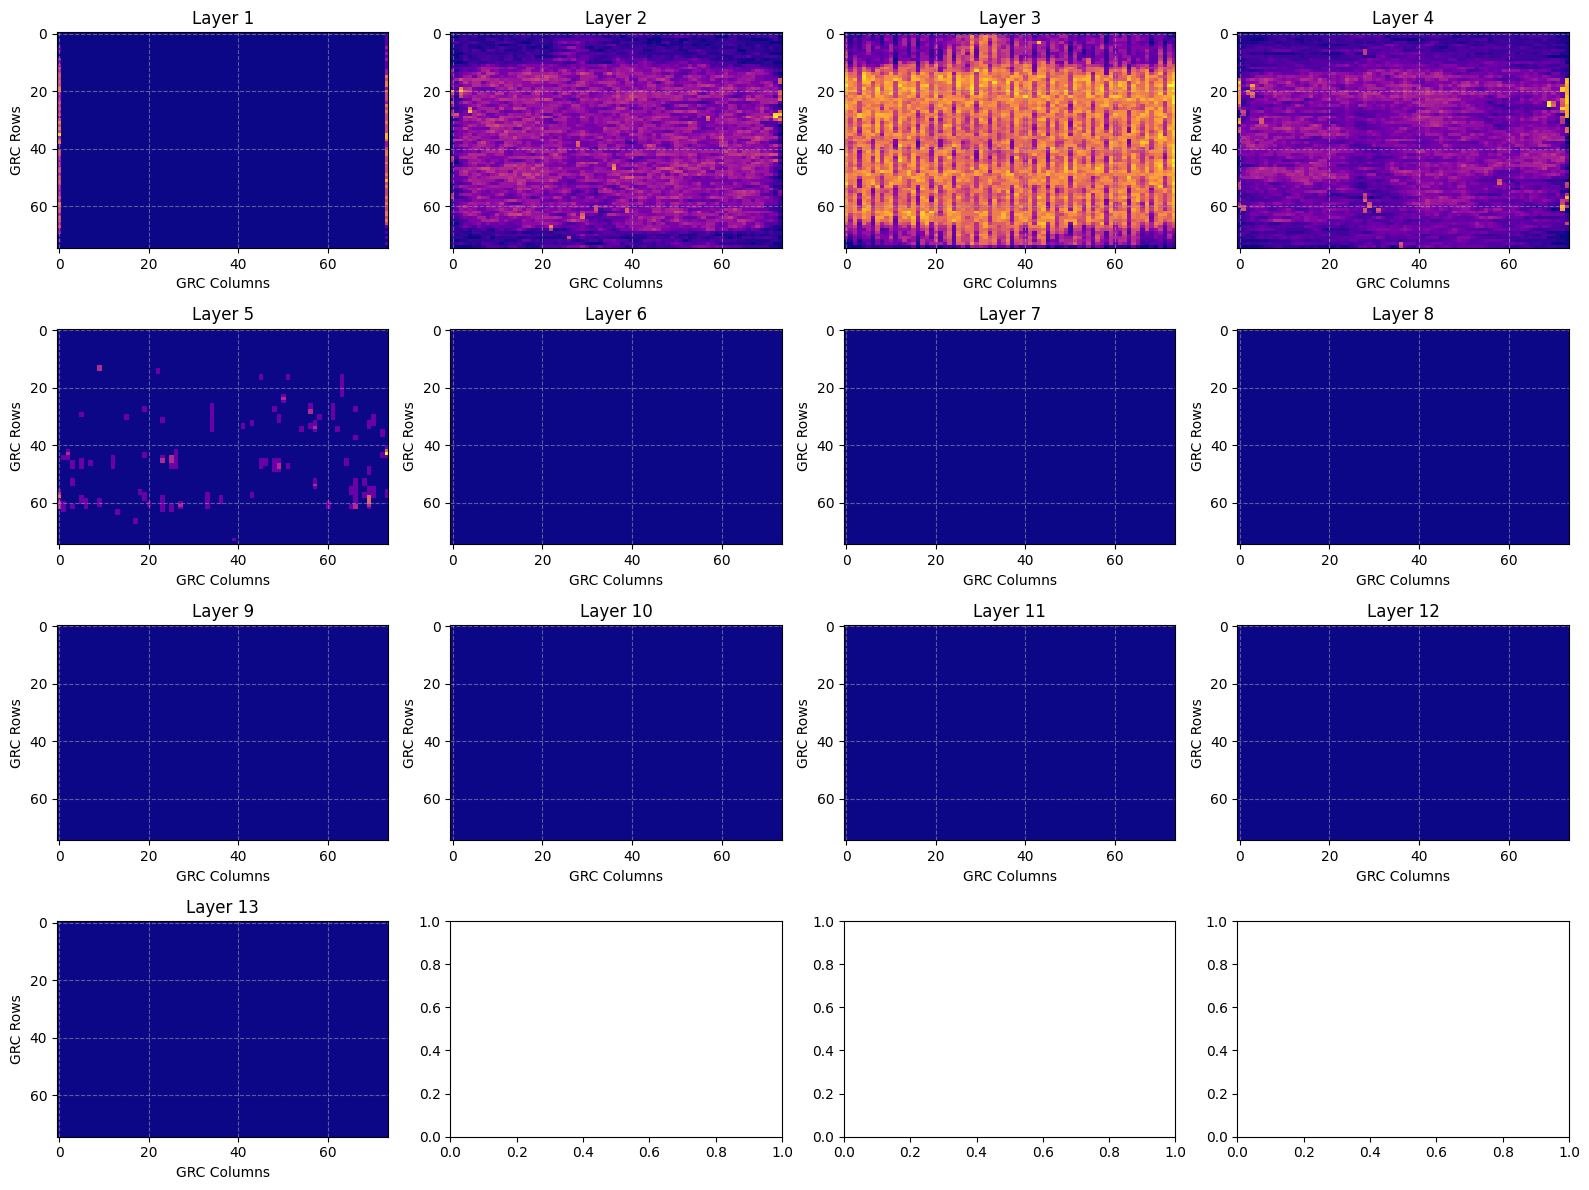

Design 9


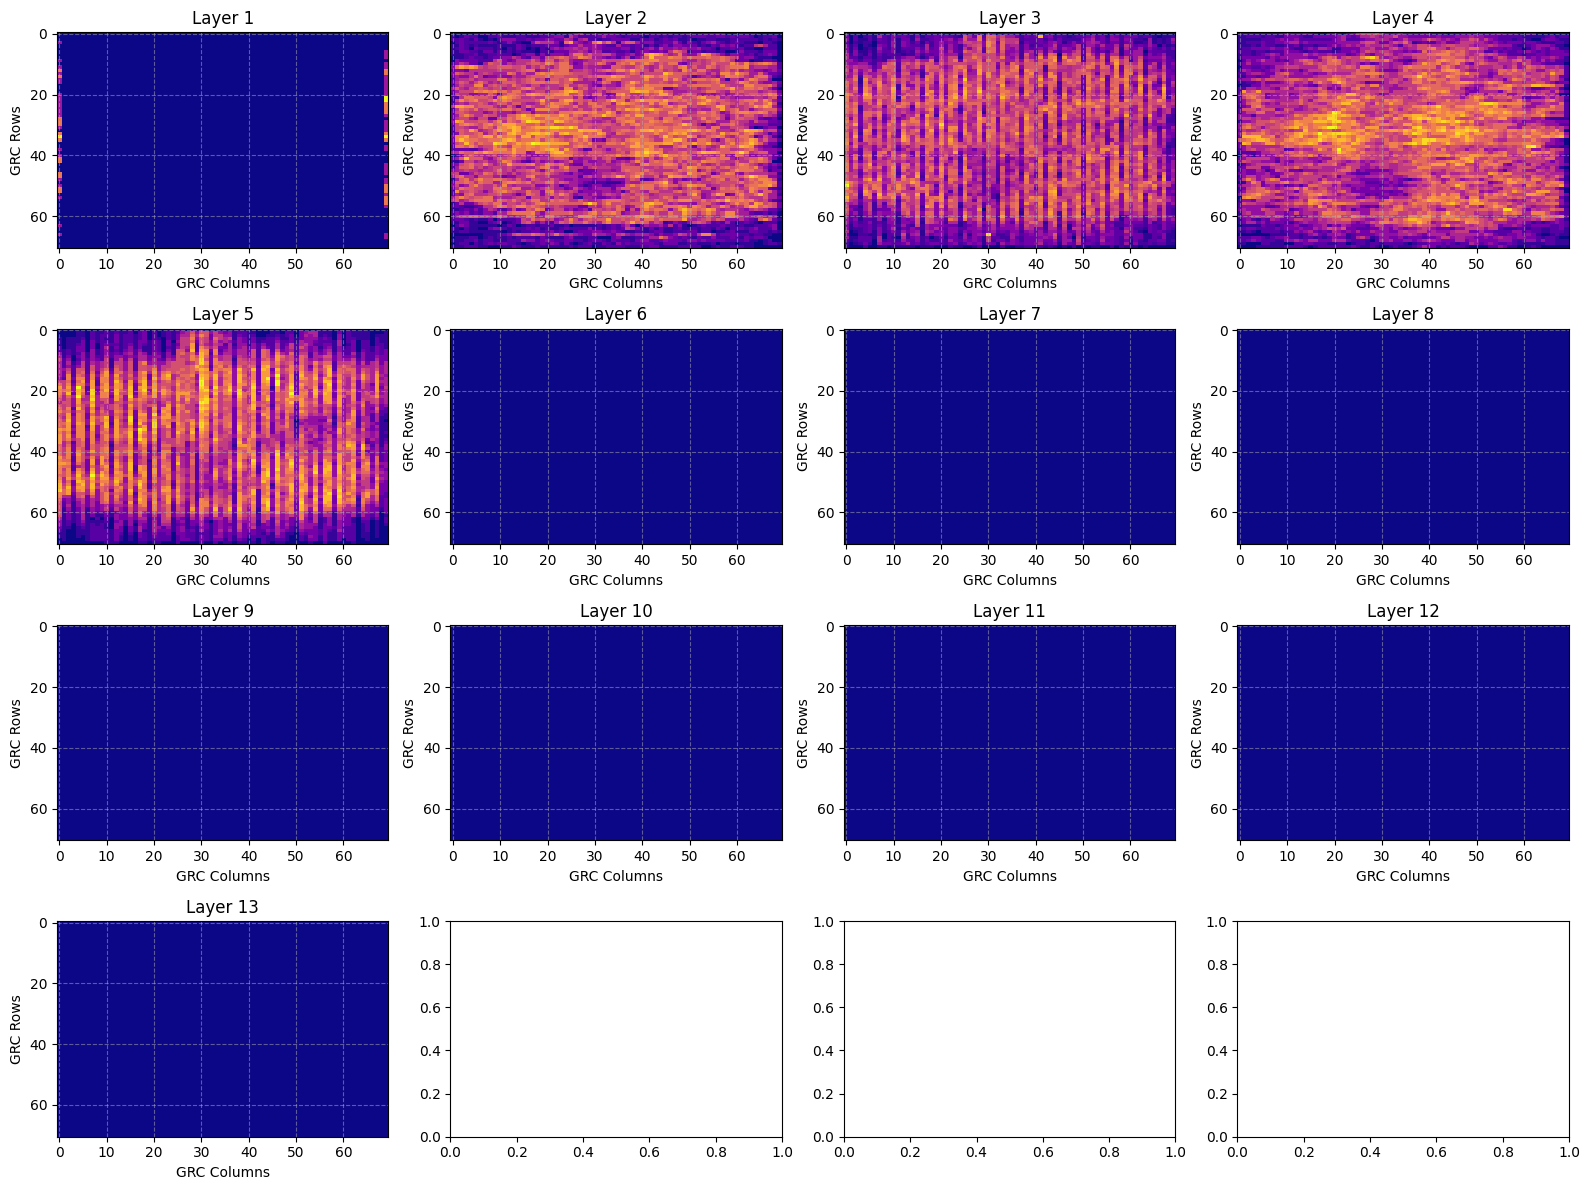

Design 10


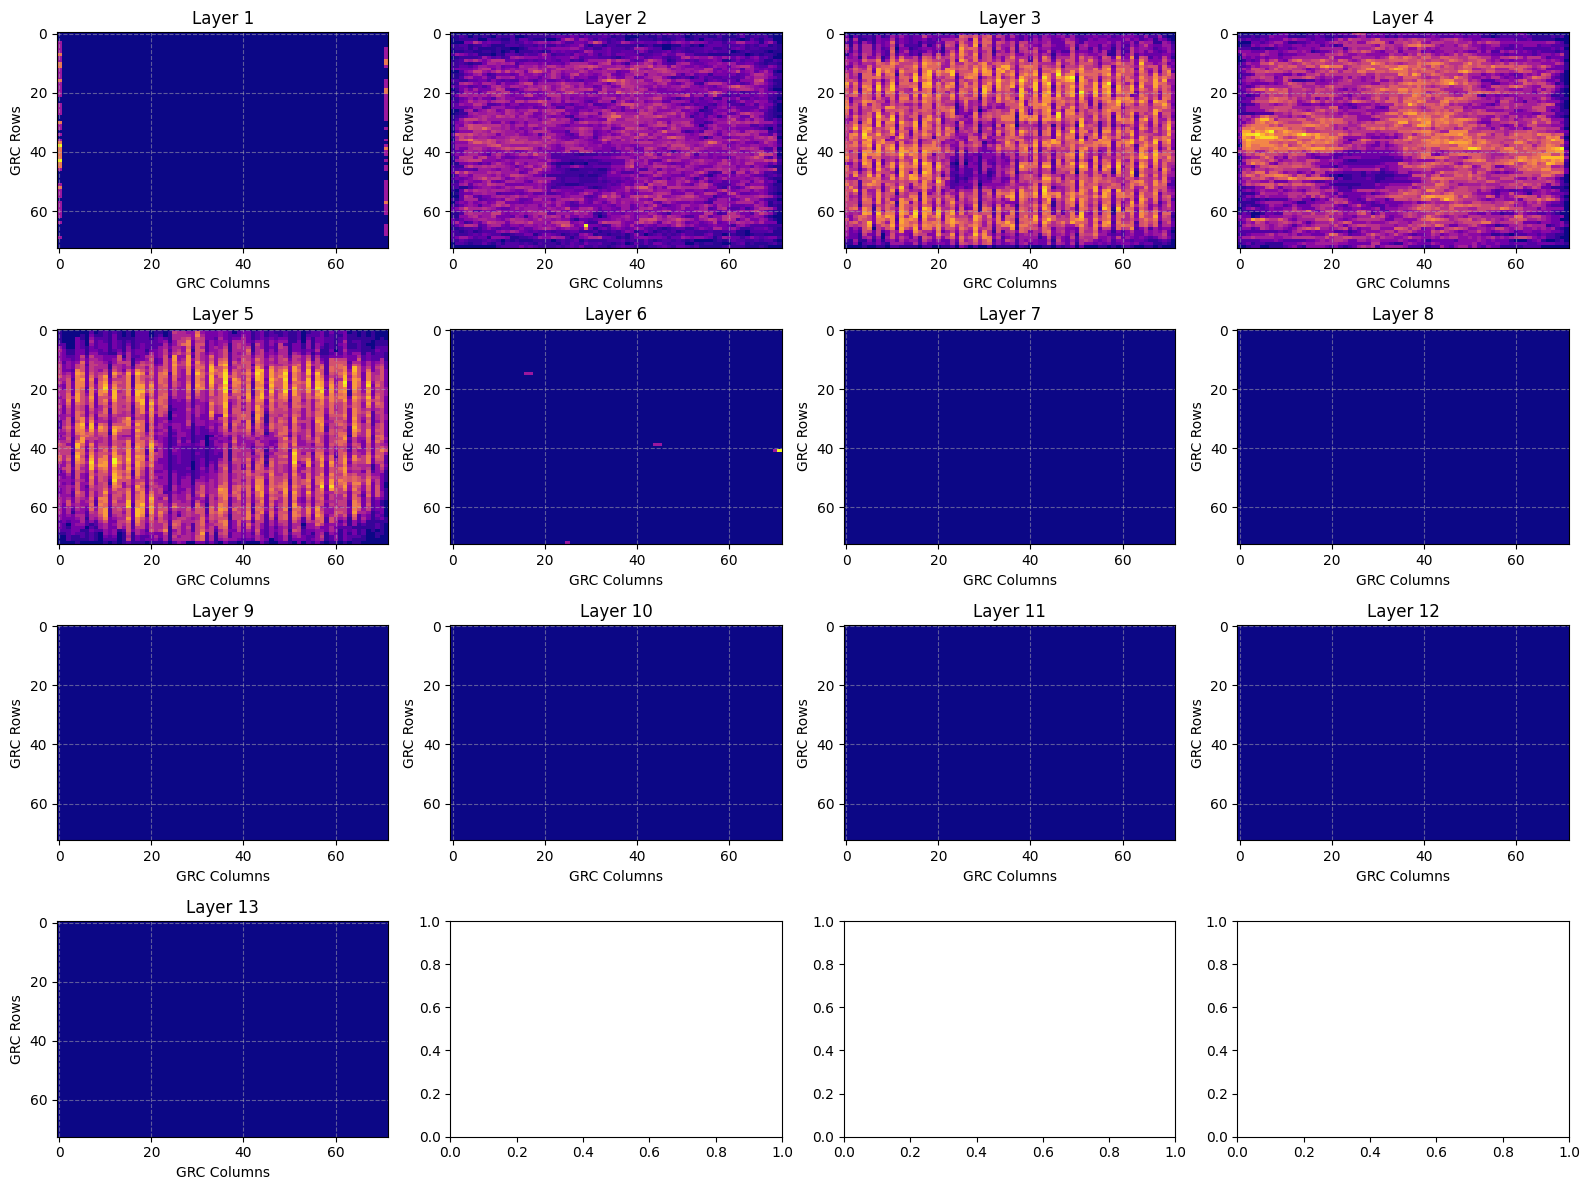

Design 11


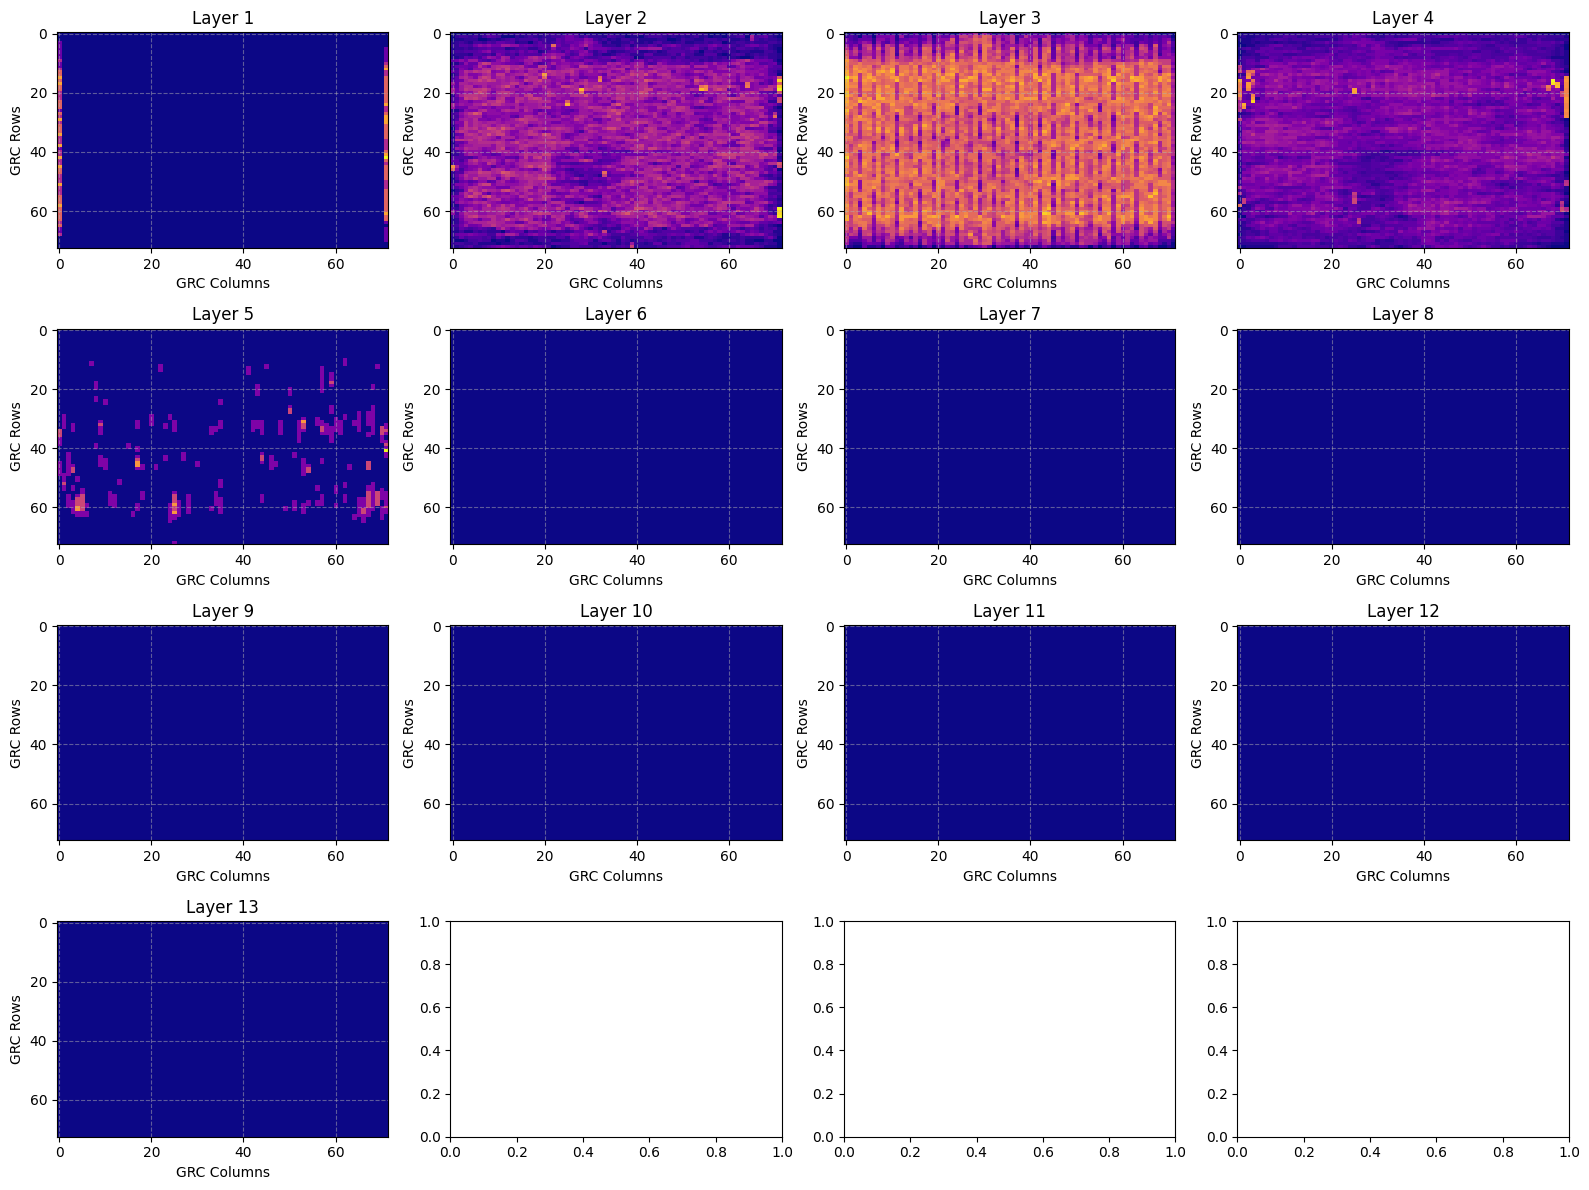

Design 12


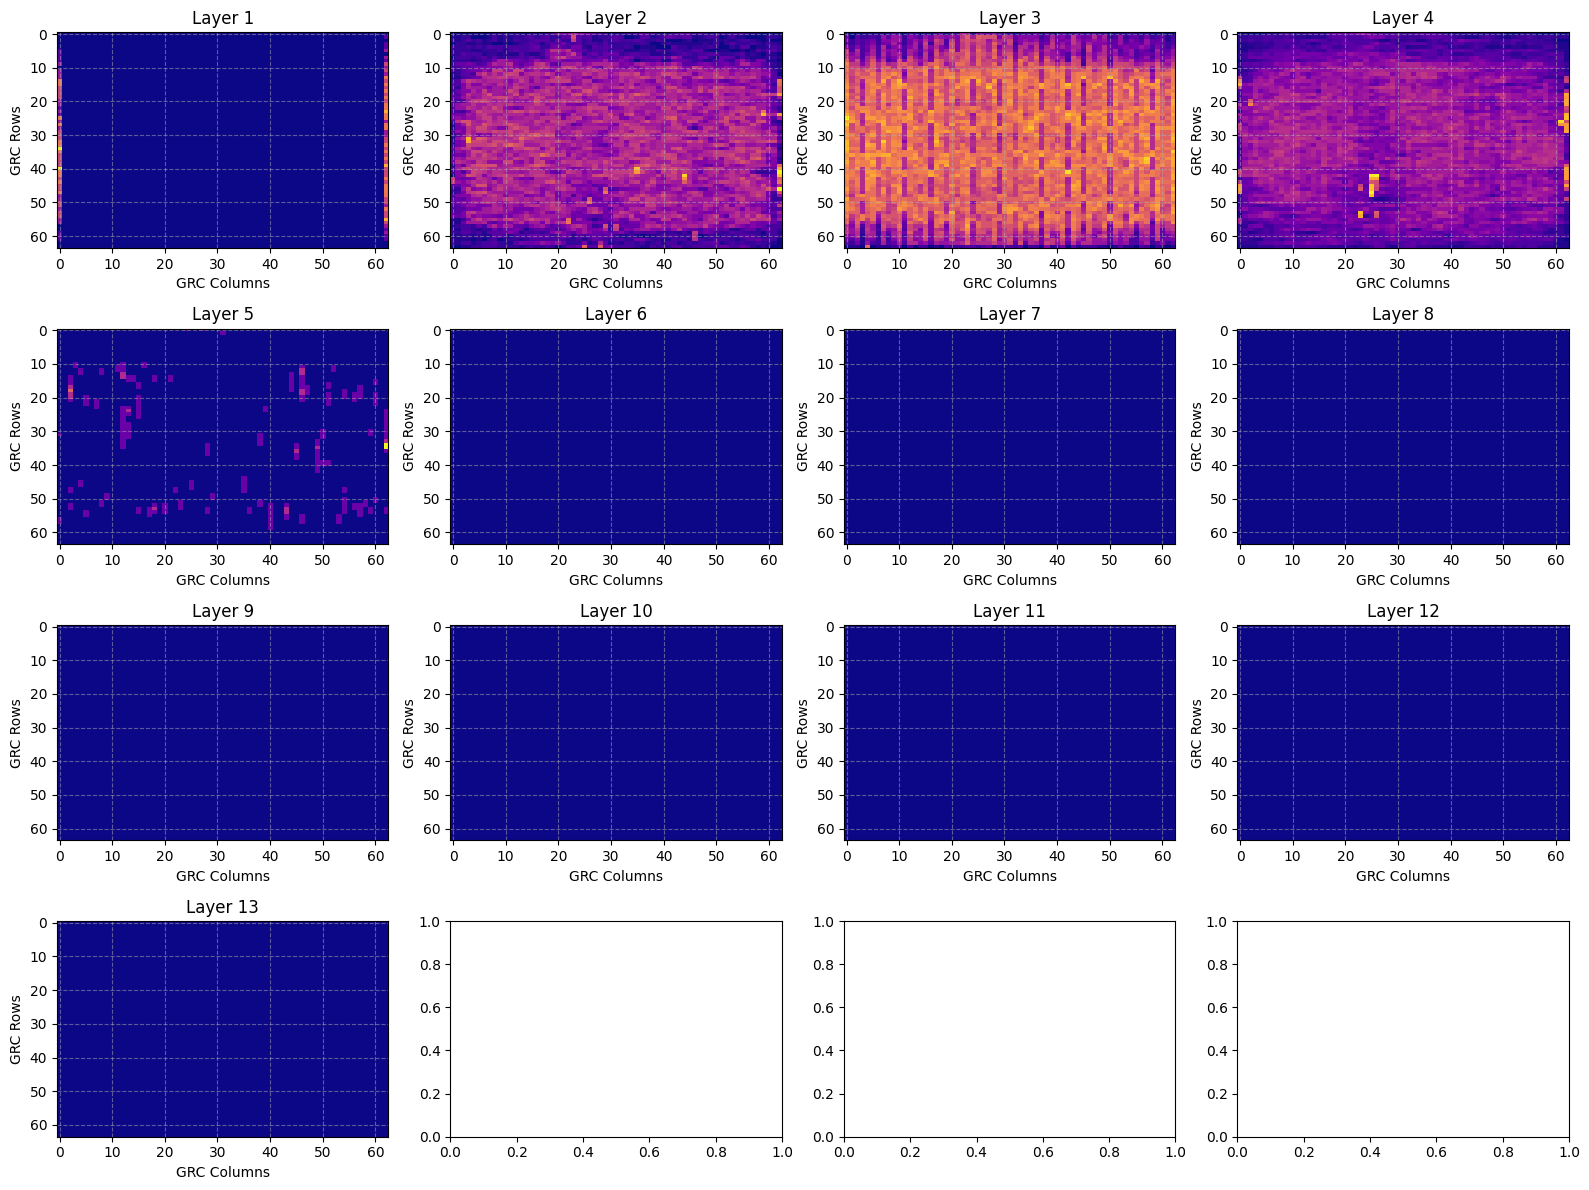

Design 13


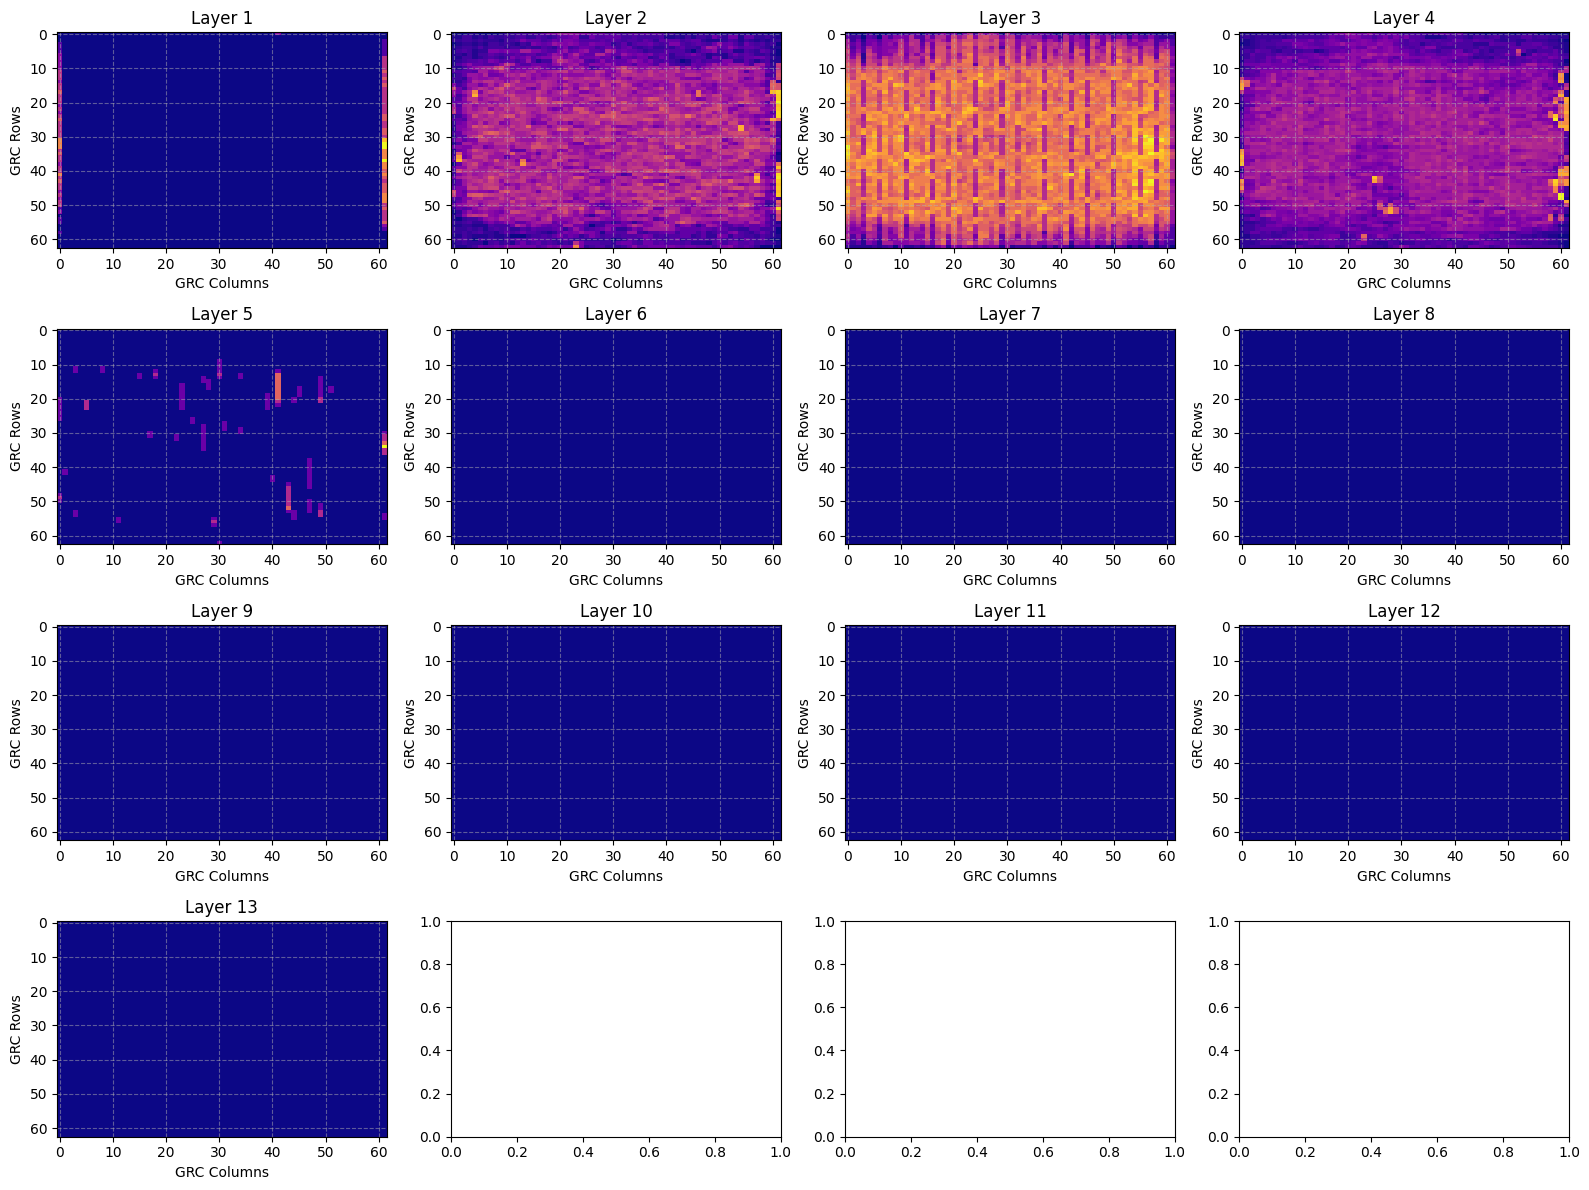

In [24]:
num_designs = 13

for design_num in range(1, num_designs + 1):
    print(f"Design {design_num}")
    file_path = f'NCSU-DigIC-GraphData-2023-07-25/xbar/{design_num}/xbar_congestion.npz'

    congestion_data = np.load(file_path)
    demand = congestion_data['demand']
    xbl = congestion_data['xBoundaryList']
    ybl = congestion_data['yBoundaryList'] 

    num_layers = demand.shape[0]
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
    axes = axes.flatten()

    for layer_idx in range(num_layers):
        congestion_layer = demand[layer_idx, :, :]
        ax = axes[layer_idx]
        im = ax.imshow(congestion_layer, cmap='plasma', interpolation='nearest', aspect='auto')
        ax.set_title(f'Layer {layer_idx + 1}')
        ax.set_xlabel('GRC Columns')
        ax.set_ylabel('GRC Rows')
        ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Blue being the lightest to Yellow being more congested